## Introdução

O dataset que escolhemos foi “Suicide Rates Overview 1985 to 2016” e o nosso
objetivo é observar como os atributos presentes neste dataset e as relações entre eles têm
impacto no atributo suicides_no (número de suicídios). Assim, para efetuar esta análise,
usamos o ambiente miniconda.

In [1]:
'''import libraries'''
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
'''Load CSV '''
df = pd.read_csv('master.csv')

## Análise dos dados


### Descrição dos atributos
De forma a perceber a melhor forma de abordar o problema, começamos por
analisar as features do dataset, Assim, podemos verificar que o dataset é composto pelos
seguintes atributos:
● country - variável do tipo string que identifica o país analisado.
● year - variável do tipo int que representa o ano correspondente ao levantamento dos
dados.
● sex - variável do tipo string que define o sexo das pessoas que cometeram suicídio.
● age - variável do tipo string que representa a faixa etária dos individuos que
cometeram suicídio.
● suicides_no - variável do tipo int que corresponde ao número de suicídios
ocorridos.
● population - variável do tipo int que define a população de um determinado país
num determinado ano.
● suicides/100k pop - variável do tipo double que corresponde ao número de
suicídios por cada 100 mil habitantes .
● country-year - variável do tipo string que representa o país e o ano correspondente
ao levantamento de dados .
● HDI for year - variável do tipo double que corresponde ao índice de
desenvolvimento humano.
● gdp_for_year - variável do tipo string que representa o grau de desenvolvimento de
um país num determinado ano
● gdp_per_capita - variável do tipo inteiro que representa o grau de desenvolvimento
de um país per capita.
● generation - variável do tipo string que representa a geração do conjunto de
pessoas que cometeram suicidio.



In [3]:
print(df.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


In [4]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [6]:
df.shape
#output:  (linhas, colunas)

(27820, 12)

In [7]:
df.info()
#Descreve os tipos dos respetivos atributos e conta o número de valores não NULL

#Como podemos observar no output apenas 8364 das 27820 não são valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
'''Dados em Falta'''
df.isna().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [9]:
print(df.isna().sum())
# Tal como em cima confirmamos aqui verificamos 19456 entradas nulas 
# no atributo 'HDI for year'

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


In [15]:
# Contar o número de registos repetidos
print(df.duplicated().sum())

0


In [16]:
df['HDI for year'].value_counts()

HDI for year
0.772    84
0.713    84
0.888    84
0.830    72
0.761    72
         ..
0.696    12
0.894    12
0.893    12
0.770    12
0.675    12
Name: count, Length: 305, dtype: int64

In [17]:
df['HDI for year'].describe()

count    8364.000000
mean        0.776601
std         0.093367
min         0.483000
25%         0.713000
50%         0.779000
75%         0.855000
max         0.944000
Name: HDI for year, dtype: float64

Axes(0.125,0.11;0.775x0.77)


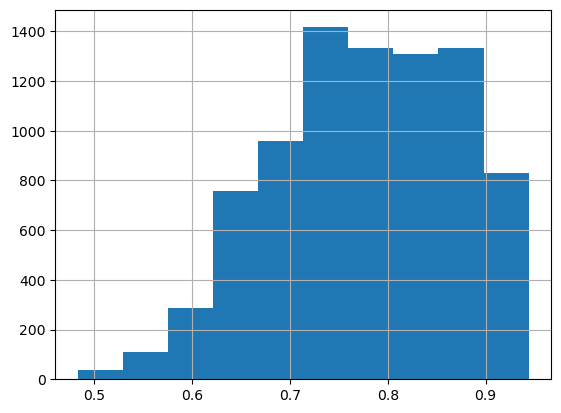

In [18]:
print(df['HDI for year'].hist())

In [19]:
print(f"Skewness: {df['HDI for year'].skew()}")
print(f"Kurtosis: {df['HDI for year'].kurt()}")

Skewness: -0.30087744889575646
Kurtosis: -0.6479139271723233


<Axes: >

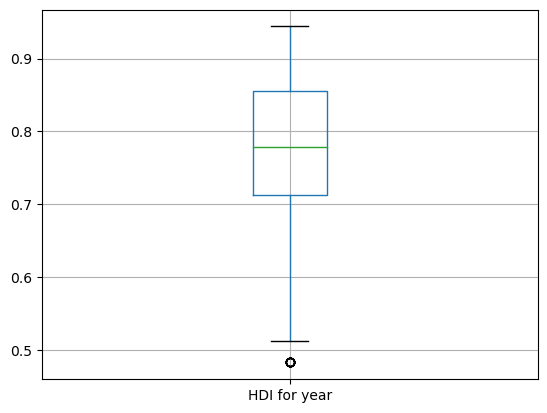

In [21]:
df.boxplot('HDI for year')

In [23]:
df['HDI for year'] = df['HDI for year'].fillna(df['HDI for year'].median())

Axes(0.125,0.11;0.775x0.77)


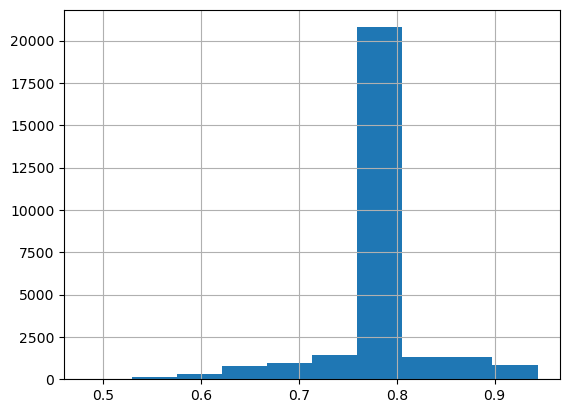

In [24]:
print(df['HDI for year'].hist())

### Tratamento de Missing Values

### Tratamento dos dados